# Linear Regression Task

In [1]:
# import libiraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data=pd.read_csv("C:\\Users\\CEC\\Desktop\\Expanded_data_with_more_features.csv")

In [3]:
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [73]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [74]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [75]:
data.duplicated().sum()

0

In [76]:
# drop unnaned column
data=data.drop("Unnamed: 0",axis=1)

In [77]:
# i will fill all nulls in categorical data with most frequent value
cat_col=data.select_dtypes(include=[object]).columns
for col in cat_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [78]:
data.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1572
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [79]:
# fill NrSiblings with average
data["NrSiblings"]=data["NrSiblings"].fillna(data["NrSiblings"].mean())

In [80]:
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

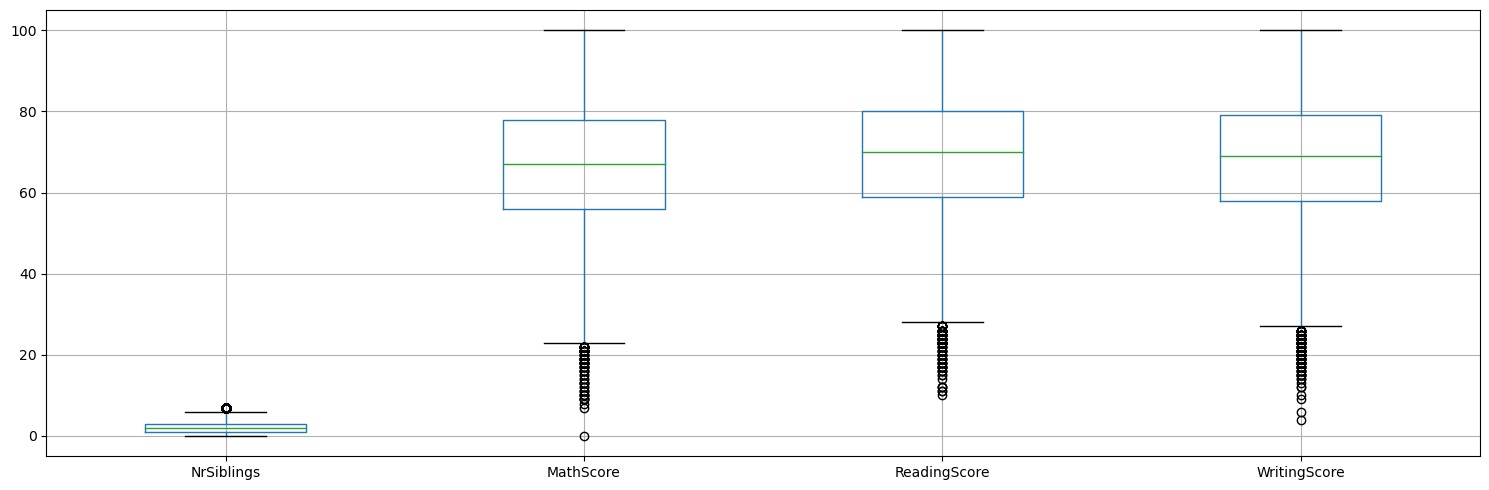

In [81]:
# check outliers using boxplot
fig,ax=plt.subplots(figsize=(15,5))
data.boxplot(ax=ax)
plt.tight_layout()
plt.show()
# i can't change values in target columns

In [82]:
# encode categorical data with label encoder
labelen=LabelEncoder()
for col in cat_col:
    data[col]=labelen.fit_transform(data[col])

In [83]:
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,2,1,1,1,1,1,1,3.0,1,1,71,71,74
1,0,2,4,1,1,1,2,1,0.0,1,0,69,90,88
2,0,1,3,1,1,2,2,1,4.0,1,1,87,93,91
3,1,0,0,0,1,1,0,0,1.0,1,0,45,56,42
4,1,2,4,1,1,1,2,1,0.0,1,0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,2,1,1,2,2,0,2.0,1,0,59,61,65
30637,1,4,2,1,1,2,1,0,1.0,0,0,58,53,51
30638,0,2,2,0,0,1,2,0,1.0,0,0,61,70,67
30639,0,3,0,1,0,1,1,0,3.0,1,0,82,90,93


EDA

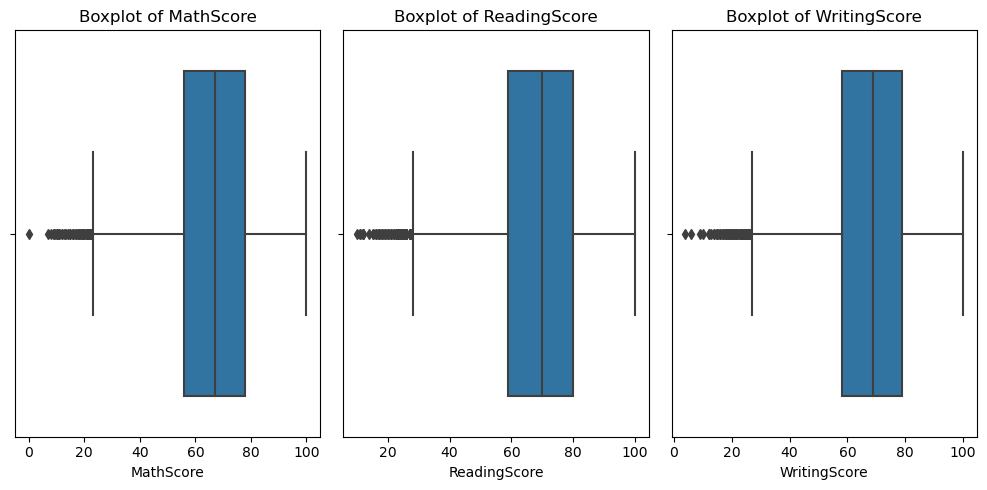

In [84]:
# visualize distribution of target only
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
columns = ['MathScore', 'ReadingScore', 'WritingScore']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

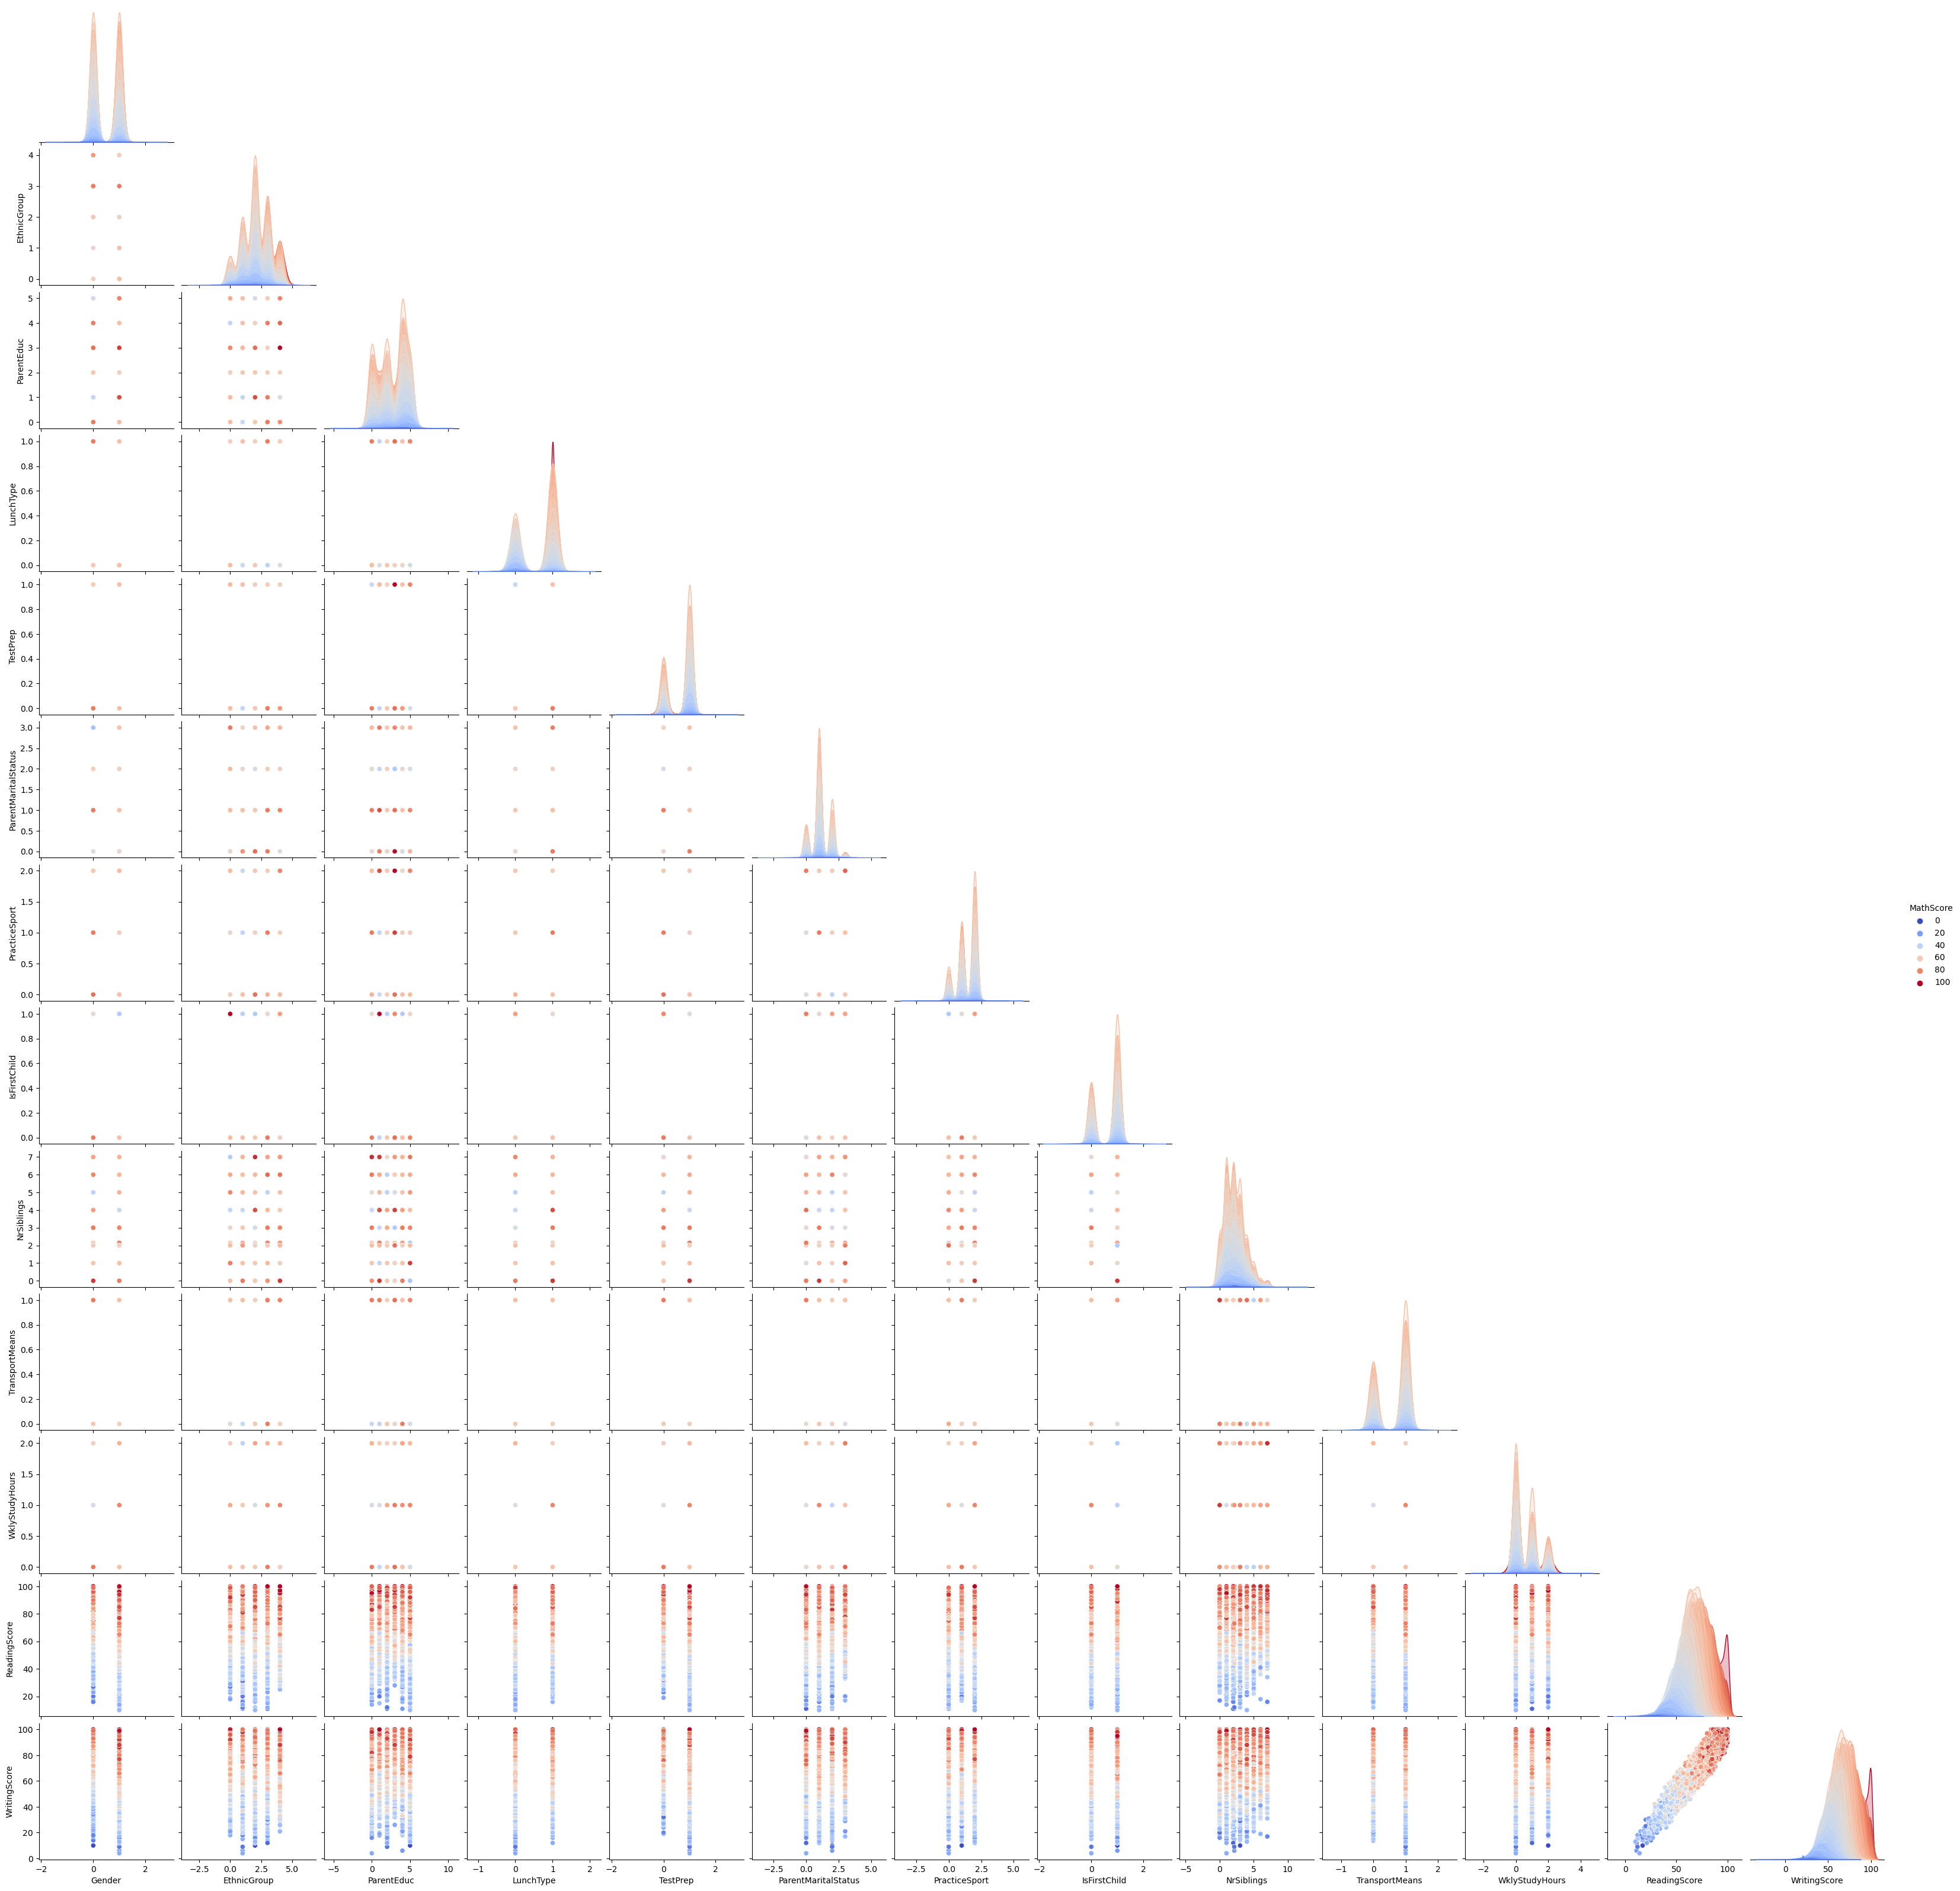

In [21]:
sns.pairplot(data, hue="MathScore", diag_kind="kde", corner=True, palette="coolwarm")

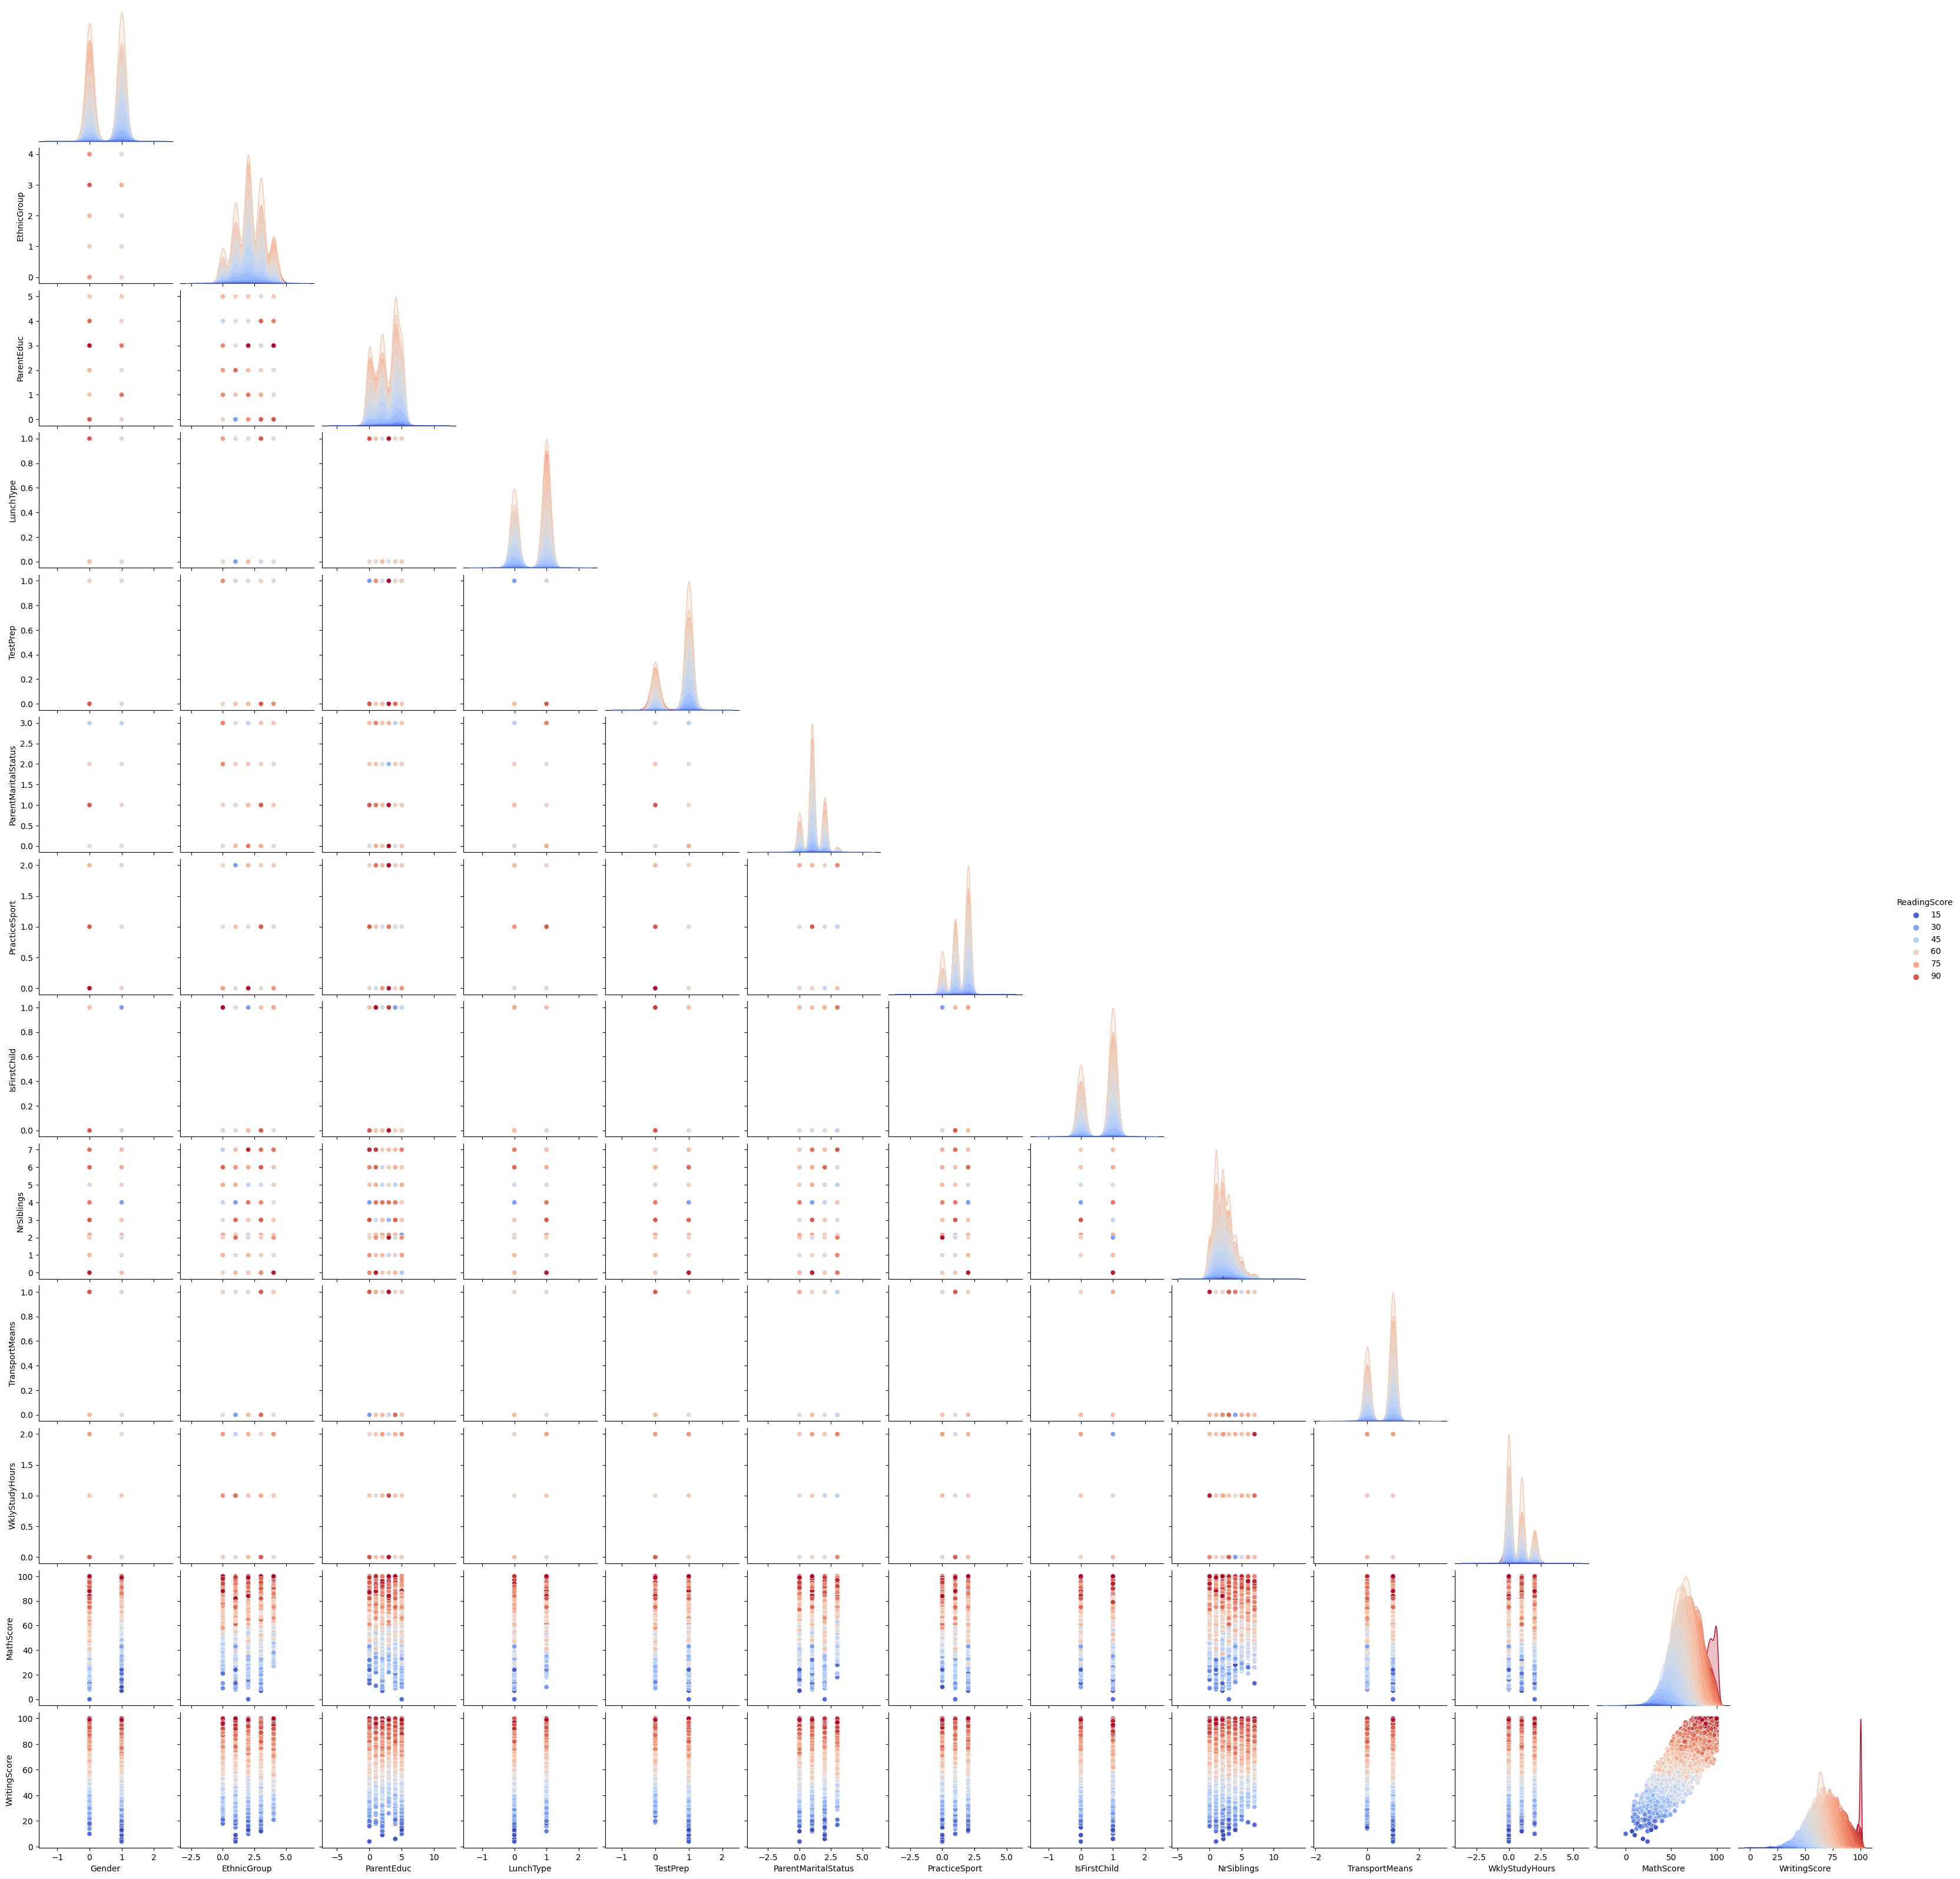

In [22]:
sns.pairplot(data, hue="ReadingScore", diag_kind="kde", corner=True, palette="coolwarm")

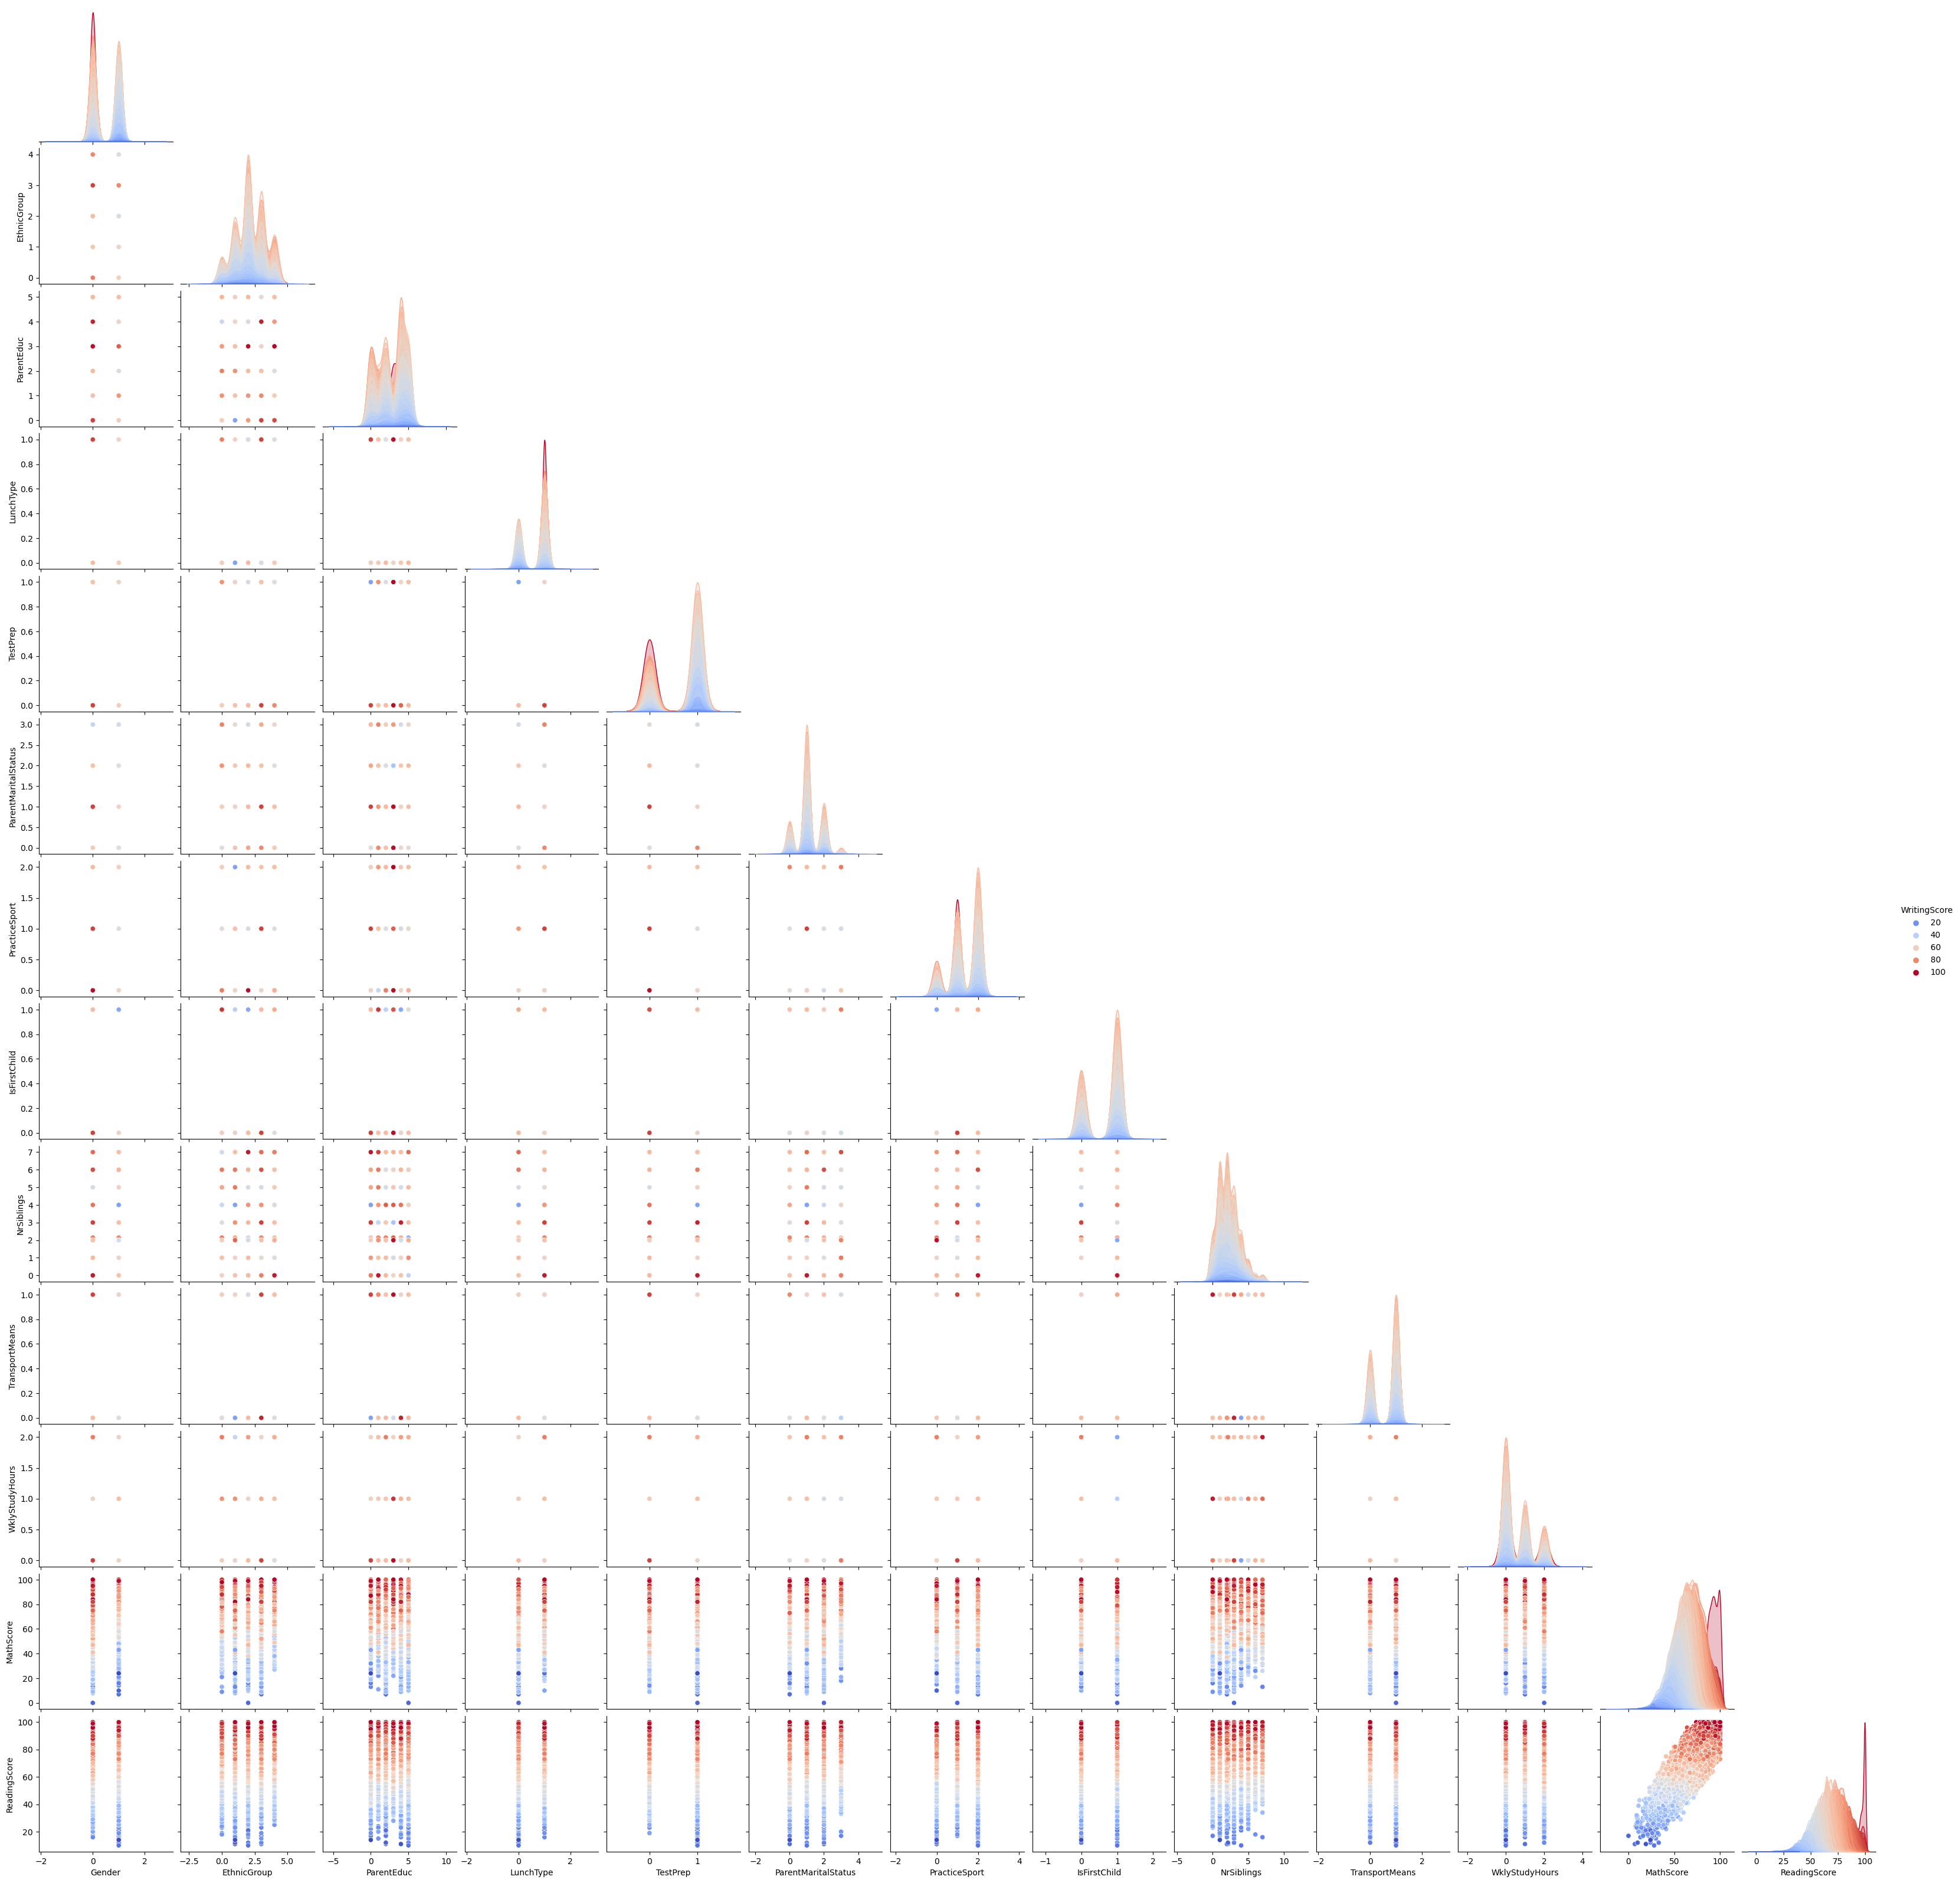

In [23]:
sns.pairplot(data, hue="WritingScore", diag_kind="kde", corner=True, palette="coolwarm")

In [85]:
# show correlation
data.corr()["MathScore"].sort_values()

TestPrep              -0.134949
ParentEduc            -0.106774
ParentMaritalStatus   -0.007799
NrSiblings            -0.001163
TransportMeans         0.002351
IsFirstChild           0.014809
PracticeSport          0.015933
WklyStudyHours         0.016634
Gender                 0.162391
EthnicGroup            0.216513
LunchType              0.367942
WritingScore           0.807118
ReadingScore           0.817825
MathScore              1.000000
Name: MathScore, dtype: float64

In [86]:
data.corr()["ReadingScore"].sort_values()

Gender                -0.237097
TestPrep              -0.204724
ParentEduc            -0.107025
ParentMaritalStatus   -0.008517
TransportMeans        -0.004933
NrSiblings            -0.000851
WklyStudyHours         0.001108
PracticeSport          0.006966
IsFirstChild           0.012117
EthnicGroup            0.140838
LunchType              0.258152
MathScore              0.817825
WritingScore           0.952584
ReadingScore           1.000000
Name: ReadingScore, dtype: float64

In [87]:
data.corr()["WritingScore"].sort_values()

Gender                -0.289312
TestPrep              -0.282308
ParentEduc            -0.118968
ParentMaritalStatus   -0.010730
TransportMeans        -0.004522
NrSiblings            -0.002487
PracticeSport          0.007150
WklyStudyHours         0.008888
IsFirstChild           0.009822
EthnicGroup            0.156224
LunchType              0.274305
MathScore              0.807118
ReadingScore           0.952584
WritingScore           1.000000
Name: WritingScore, dtype: float64

In [88]:
# The first target MathScore
feature_1=data.drop("MathScore",axis=1)
target_1=data["MathScore"]

In [89]:
X_train,X_test,y_train,y_test = train_test_split(feature_1,target_1,test_size = 0.3,random_state = 0)

In [90]:
LR_1=LinearRegression()
LR_1.fit(X_train,y_train)

LinearRegression()

In [56]:
predicted_MathScore=LR_1.predict(X_test)

In [93]:
print("The mean absolute error is ",mean_absolute_error(predicted_MathScore,y_test))
print("The mean squared error is ",mean_squared_error(predicted_MathScore,y_test))
print("The r2 score  is ",r2_score(predicted_MathScore,y_test))
print("Train score is ",LR_1.score(X_train,y_train))

The mean absolute error is  4.57028562949012
The mean squared error is  32.53301980315892
The r2 score  is  0.8380290928026989
Train score is  0.8638756322956112


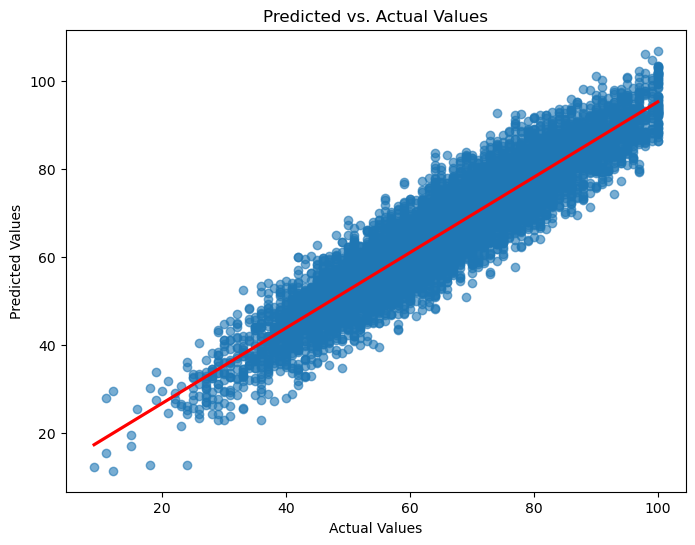

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=predicted_MathScore, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [95]:
# The second target ReadingScore
feature_2=data.drop("ReadingScore",axis=1)
target_2=data["ReadingScore"]

In [96]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(feature_2,target_2,test_size = 0.3,random_state = 0)

In [97]:
LR_2=LinearRegression()
LR_2.fit(X_train_2,y_train_2)

LinearRegression()

In [98]:
predicted_ReadingScore=LR_2.predict(X_test_2)

In [99]:
print("The mean absolute error is ",mean_absolute_error(predicted_ReadingScore,y_test_2))
print("The mean squared error is ",mean_squared_error(predicted_ReadingScore,y_test_2))
print("The r2 score  is ",r2_score(predicted_ReadingScore,y_test_2))
print("Train score is ",LR_2.score(X_train_2,y_train_2))

The mean absolute error is  3.3850274069007993
The mean squared error is  17.763178558173013
The r2 score  is  0.9106164994517342
Train score is  0.9198177499776383


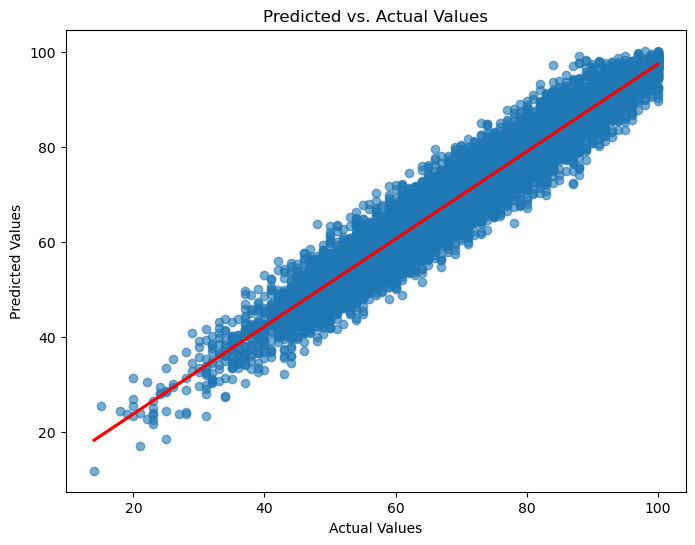

In [100]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_2, y=predicted_ReadingScore, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [101]:
# The third target WritingScore
feature_3=data.drop("WritingScore",axis=1)
target_3=data["WritingScore"]

In [102]:
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(feature_3,target_3,test_size = 0.2,random_state = 0)

In [103]:
LR_3=LinearRegression()
LR_3.fit(X_train_3,y_train_3)

LinearRegression()

In [104]:
predicted_WritingScore=LR_3.predict(X_test_3)

In [105]:
print("The mean absolute error is ",mean_absolute_error(predicted_WritingScore,y_test_3))
print("The mean squared error is ",mean_squared_error(predicted_WritingScore,y_test_3))
print("The r2 score  is ",r2_score(predicted_WritingScore,y_test_3))
print("Train score is ",LR_3.score(X_train_3,y_train_3))

The mean absolute error is  3.121535973371692
The mean squared error is  15.219745450434043
The r2 score  is  0.9315109764096952
Train score is  0.9373208217618225


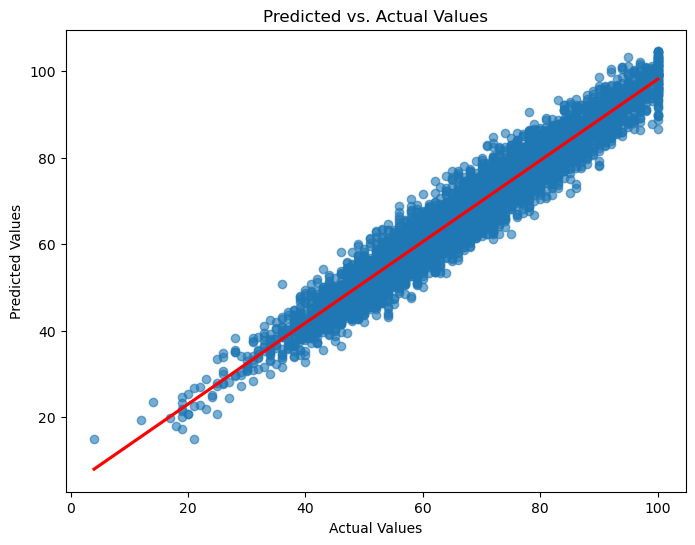

In [106]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_3, y=predicted_WritingScore, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [ ]:
# from this my opinion is this is good performance for 3 models it can be better if we removed columns which relation with target is poor but we have a small data 